**Task**:
    
    analysis of several time series data (AO, NAO)

**Modules**:
    
    pandas

[**Notebook file**](http://nbviewer.ipython.org/urls/github.com/koldunovn/earthpy.org/raw/master/content/earthpy_pandas_basics.ipynb)   

Here I am going to show just some basic [pandas](http://pandas.pydata.org/) stuff for time series analysis, as I think for the Earth Scientists it's the most interesting topic. If you find this small tutorial useful, I encourage you to watch [this video](http://pyvideo.org/video/1198/time-series-data-analysis-with-pandas), where Wes McKinney give extensive introduction to the time series data analysis with pandas.

On the official website you can find explanation of what problems pandas solve in general, but I can tell you what problem pandas solve for me. It makes analysis and visualisation of 1D data, especially time series, MUCH faster. Before pandas working with time series in python was a pain for me, now it's fun. Ease of use stimulate in-depth exploration of the data: why wouldn't you make some additional analysis if it's just one line of code? Hope you will also find this great tool helpful and useful. So, let's begin.

Thanks to *Will Bryant* for the 2017 update.

As an example we are going to use time series of [Arctic Oscillation (AO)](http://en.wikipedia.org/wiki/Arctic_oscillation) and [North Atlantic Oscillation (NAO)](http://en.wikipedia.org/wiki/North_Atlantic_oscillation) data sets.

## Module import

First we have to import necessary modules:

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame, Panel
pd.set_option('display.max_rows',15) # this limit maximum numbers of rows

And "switch on" inline graphic for the notebook:

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Pandas developing very fast, and while we are going to use only basic functionality, some details may still change in the newer versions. This example will only work in version > 0.8. Check yours:

In [3]:
pd.__version__

'0.20.3'

## Loading data

Now, when we are done with preparations, let's get some data. If you work on Windows download monthly AO data [from here](http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii). If you on *nix machine, you can do it directly from ipython notebook using system call to wget command or on Mac a curl command:

In [4]:
#!curl http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii >> 'monthly.ao.index.b50.current.ascii'
!wget http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii


--2017-11-07 18:56:56--  http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii
Resolving www.cpc.ncep.noaa.gov... 140.90.101.63
Connecting to www.cpc.ncep.noaa.gov|140.90.101.63|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20350 (20K) [text/plain]
Saving to: ‘monthly.ao.index.b50.current.ascii’

monthly.ao.index.b5 100%[===================>]  19.87K  95.0KB/s    in 0.2s    

2017-11-07 18:56:57 (95.0 KB/s) - ‘monthly.ao.index.b50.current.ascii’ saved [20350/20350]



Pandas has very good IO capabilities, but we not going to use them in this tutorial in order to keep things simple. For now we open the file simply with numpy loadtxt:

In [15]:
ao = np.loadtxt('monthly.ao.index.b50.current.ascii')

Every line in the file consist of three elements: year, month, value:

In [16]:
ao[0:2]

array([[  1.95000000e+03,   1.00000000e+00,  -6.03100000e-02],
       [  1.95000000e+03,   2.00000000e+00,   6.26810000e-01]])

And here is the shape of our array:

In [17]:
ao.shape

(814, 3)

## Time Series

We would like to convert this data in to time series, that can be manipulated naturally and easily. First step, that we have to do is to create the range of dates for our time series. From the file it is clear, that record starts at January 1950. We will start our dates at January 1950 and  generate as many time stamps as we have records. Frequency of the data is one month (freq='M'). 

In [18]:
dates = pd.date_range('1950-01', periods=ao.shape[0], freq='M')

As you see syntax is quite simple, and this is one of the reasons why I love Pandas so much :) You can check if the range of dates is properly generated:

In [19]:
dates

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31'],
              dtype='datetime64[ns]', length=814, freq='M')

In [20]:
dates.shape

(814,)

Now we are ready to create our first time series. Dates from the *dates* variable will be our index, and AO values will be our, hm... values:

In [21]:
AO = Series(ao[:,2], index=dates)

In [22]:
AO

1950-01-31   -0.060310
1950-02-28    0.626810
1950-03-31   -0.008127
1950-04-30    0.555100
1950-05-31    0.071577
1950-06-30    0.538570
1950-07-31   -0.802480
                ...   
2017-04-30   -0.088658
2017-05-31   -0.730140
2017-06-30    0.401660
2017-07-31    0.634230
2017-08-31    0.150040
2017-09-30   -0.492450
2017-10-31    0.690340
Freq: M, Length: 814, dtype: float64

Now we can plot complete time series:

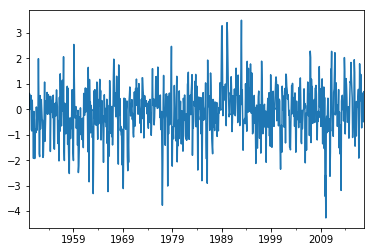

In [23]:
AO.plot()

or its part:

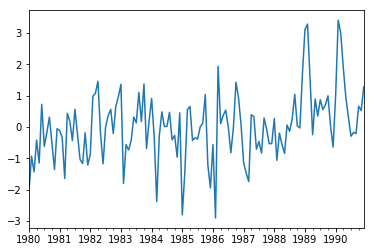

In [24]:
AO['1980':'1990'].plot()

or even smaller part:

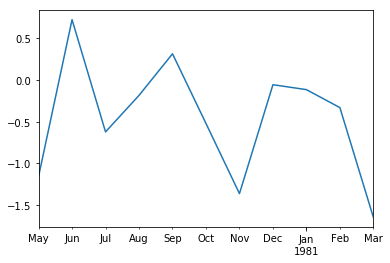

In [25]:
AO['1980-05':'1981-03'].plot()

Reference to the time periods is done in a very natural way. You, of course, can also get individual values. By number: 

In [26]:
AO[120]

-2.4842

or by index (date in our case):

In [27]:
AO['1960-01']

1960-01-31   -2.4842
Freq: M, dtype: float64

And what if we choose only one year?

In [28]:
AO['1960']

1960-01-31   -2.484200
1960-02-29   -2.212400
1960-03-31   -1.624600
1960-04-30   -0.297310
1960-05-31   -0.857430
1960-06-30    0.054978
1960-07-31   -0.619060
1960-08-31   -1.007900
1960-09-30   -0.381640
1960-10-31   -1.187000
1960-11-30   -0.553230
1960-12-31   -0.342950
Freq: M, dtype: float64

Isn't that great? :)

One bonus example :)

In [29]:
AO[AO > 0]

1950-02-28    0.626810
1950-04-30    0.555100
1950-05-31    0.071577
1950-06-30    0.538570
1950-09-30    0.357970
1951-07-31    0.090023
1951-12-31    1.987200
                ...   
2017-01-31    0.941970
2017-02-28    0.339860
2017-03-31    1.365400
2017-06-30    0.401660
2017-07-31    0.634230
2017-08-31    0.150040
2017-10-31    0.690340
Length: 381, dtype: float64

## Data Frame

Now let's make life a bit more interesting and download more data. This will be NOA time series (Windows users can get it [here](http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii), Mac users can use curl).

In [30]:
#!curl http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii >> 'norm.nao.monthly.b5001.current.ascii'
!wget http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii

--2017-11-07 19:03:09--  http://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii
Resolving www.cpc.ncep.noaa.gov... 140.90.101.63
Connecting to www.cpc.ncep.noaa.gov|140.90.101.63|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19536 (19K) [text/plain]
Saving to: ‘norm.nao.monthly.b5001.current.ascii’

norm.nao.monthly.b5 100%[===================>]  19.08K  22.6KB/s    in 0.8s    

2017-11-07 19:03:10 (22.6 KB/s) - ‘norm.nao.monthly.b5001.current.ascii’ saved [19536/19536]



Create Series the same way as we did for AO:

In [31]:
nao = np.loadtxt('norm.nao.monthly.b5001.current.ascii')
dates_nao = pd.date_range('1950-01', periods=nao.shape[0], freq='M')
NAO = Series(nao[:,2], index=dates_nao)

Time period is the same:

In [32]:
NAO.index

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31'],
              dtype='datetime64[ns]', length=814, freq='M')

Now we create Data Frame, that will contain both AO and NAO data. It sort of an Excel table where the first row contain headers for the columns and firs column is an index:

In [33]:
aonao = DataFrame({'AO' : AO, 'NAO' : NAO})

One can plot the data straight away:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11a7dc320>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11ae40b38>], dtype=object)

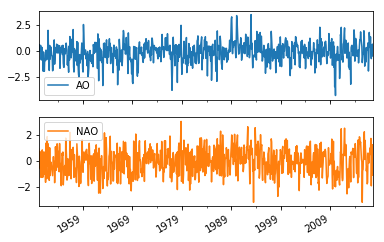

In [34]:
aonao.plot(subplots=True)

Or have a look at the first several rows:

In [35]:
aonao.head()

,AO,NAO
1950-01-31,-0.060310,0.92
1950-02-28,0.626810,0.40
1950-03-31,-0.008127,-0.36
1950-04-30,0.555100,0.73
1950-05-31,0.071577,-0.59


We can reference each column by its name:

In [36]:
aonao['NAO']

1950-01-31    0.920000
1950-02-28    0.400000
1950-03-31   -0.360000
1950-04-30    0.730000
1950-05-31   -0.590000
1950-06-30   -0.060000
1950-07-31   -1.260000
                ...   
2017-04-30    1.732500
2017-05-31   -1.911000
2017-06-30    0.045036
2017-07-31    1.255600
2017-08-31   -1.097700
2017-09-30   -0.612730
2017-10-31    0.185940
Freq: M, Name: NAO, Length: 814, dtype: float64

or as method of the Data Frame variable (if name of the variable is a valid python name):

In [37]:
aonao.NAO

1950-01-31    0.920000
1950-02-28    0.400000
1950-03-31   -0.360000
1950-04-30    0.730000
1950-05-31   -0.590000
1950-06-30   -0.060000
1950-07-31   -1.260000
                ...   
2017-04-30    1.732500
2017-05-31   -1.911000
2017-06-30    0.045036
2017-07-31    1.255600
2017-08-31   -1.097700
2017-09-30   -0.612730
2017-10-31    0.185940
Freq: M, Name: NAO, Length: 814, dtype: float64

We can simply add column to the Data Frame:

In [38]:
aonao['Diff'] = aonao['AO'] - aonao['NAO']
aonao.head()

,AO,NAO,Diff
1950-01-31,-0.060310,0.92,-0.980310
1950-02-28,0.626810,0.40,0.226810
1950-03-31,-0.008127,-0.36,0.351872
1950-04-30,0.555100,0.73,-0.174900
1950-05-31,0.071577,-0.59,0.661577


And delete it:

In [39]:
del aonao['Diff']
aonao.tail()

,AO,NAO
2017-06-30,0.40166,0.045036
2017-07-31,0.63423,1.255600
2017-08-31,0.15004,-1.097700
2017-09-30,-0.49245,-0.612730
2017-10-31,0.69034,0.185940


Slicing will also work:

In [40]:
aonao['1981-01':'1981-03']

,AO,NAO
1981-01-31,-0.11634,0.37
1981-02-28,-0.33158,0.92
1981-03-31,-1.64470,-1.19


even in some crazy combinations:

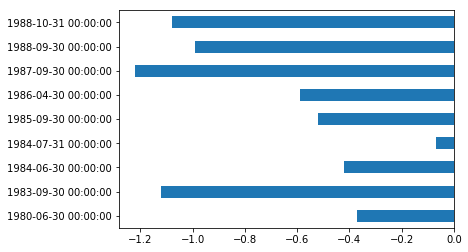

In [41]:
import datetime
aonao.loc[(aonao.AO > 0) & (aonao.NAO < 0) 
        & (aonao.index > datetime.datetime(1980,1,1)) 
        & (aonao.index < datetime.datetime(1989,1,1)),
        'NAO'].plot(kind='barh')

Here we use special [advanced indexing attribute .ix](http://pandas.pydata.org/pandas-docs/stable/indexing.html#advanced-indexing-with-labels). We choose all NAO values in the 1980s for months where AO is positive and NAO is negative, and then plot them. Magic :)

## Statistics

Back to simple stuff. We can obtain statistical information over elements of the Data Frame. Default is column wise:

In [42]:
aonao.mean()

AO    -0.111329
NAO   -0.016255
dtype: float64

In [43]:
aonao.max()

AO     3.4953
NAO    3.0400
dtype: float64

In [44]:
aonao.min()

AO    -4.2657
NAO   -3.1800
dtype: float64

You can also do it row-wise:

In [45]:
aonao.mean(1)

1950-01-31    0.429845
1950-02-28    0.513405
1950-03-31   -0.184064
1950-04-30    0.642550
1950-05-31   -0.259211
1950-06-30    0.239285
1950-07-31   -1.031240
                ...   
2017-04-30    0.821921
2017-05-31   -1.320570
2017-06-30    0.223348
2017-07-31    0.944915
2017-08-31   -0.473830
2017-09-30   -0.552590
2017-10-31    0.438140
Freq: M, Length: 814, dtype: float64

Or get everything at once:

In [46]:
aonao.describe()

,AO,NAO
count,814.000000,814.000000
mean,-0.111329,-0.016255
std,1.004980,1.012511
min,-4.265700,-3.180000
25%,-0.651515,-0.757500
50%,-0.039931,0.042518
75%,0.478315,0.689250
max,3.495300,3.040000


## Resampling

Pandas provide easy way to resample data to different time frequency. Two main parameters for resampling is time period you resemple to and the method that you use. By default the method is mean. Following example calculates annual ('A') mean:

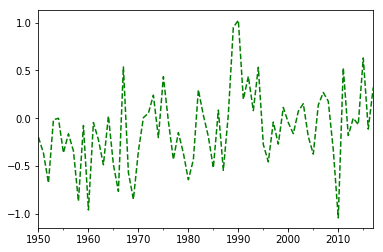

In [47]:
AO_mm = AO.resample("A").mean()
AO_mm.plot(style='g--')

median:

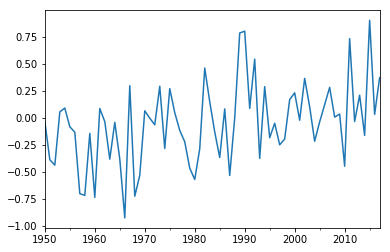

In [48]:
AO_mm = AO.resample("A").median()
AO_mm.plot()

You can use your methods for resampling, for example np.max (in this case we change resampling frequency to 3 years):

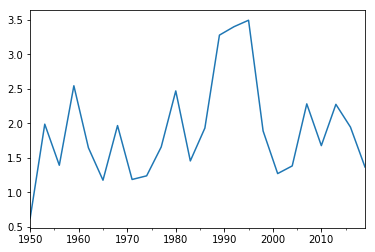

In [49]:
AO_mm = AO.resample("3A").apply(np.max)
AO_mm.plot()

You can specify several functions at once as a list:

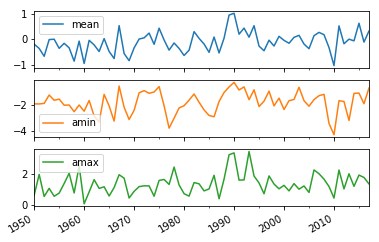

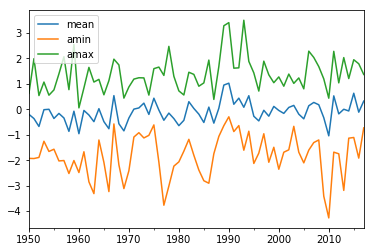

In [50]:
AO_mm = AO.resample("A").apply(['mean', np.min, np.max])
AO_mm['1900':'2020'].plot(subplots=True)
AO_mm['1900':'2020'].plot()

In [51]:
AO_mm

,mean,amin,amax
1950-12-31,-0.199501,-1.92810,0.62681
1951-12-31,-0.364626,-1.93410,1.98720
1952-12-31,-0.674990,-1.89090,0.53852
1953-12-31,-0.016515,-1.25580,1.06830
1954-12-31,-0.000770,-1.65610,0.55259
1955-12-31,-0.361816,-1.56810,0.76012
1956-12-31,-0.162823,-2.02860,1.39110
...,...,...,...
2011-12-31,0.525719,-1.68310,2.27480
2012-12-31,-0.181383,-1.74860,1.03710


## Moving (rolling) statistics

Pandas provide good collection of moving statistics.

Rolling mean:

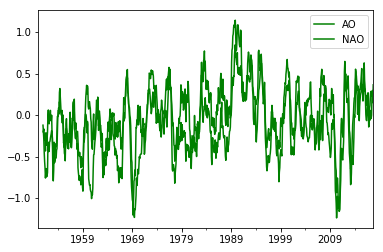

In [52]:
aonao.rolling(window=12, center=False).mean().plot(style='-g')

Rolling correlation:

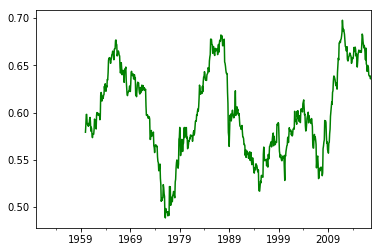

In [53]:
aonao.AO.rolling(window=120).corr(other=aonao.NAO).plot(style='-g')

By the way getting correlation coefficients for members of the Data Frame is as simple as:

In [54]:
aonao.corr()

,AO,NAO
AO,1.000000,0.604209
NAO,0.604209,1.000000


That's it. I hope you at least get a rough impression of what pandas can do for you. Comments are very welcome (below). If you have intresting examples of pandas usage in Earth Science, we would be happy to put them on [EarthPy](http://earthpy.org).